In [24]:
"""
La clusterización con k-means es un método no supervisado que agrupa datos en k clústeres según su similitud,
buscando que los puntos de cada grupo estén lo más cerca posible entre sí y lo más lejos posible de los de otros grupos.
El algoritmo funciona iniciando con k centros (centroides) escogidos al azar, luego asigna cada dato al centro
más cercano según una medida de distancia (usualmente Euclidiana) y recalcula los centroides como el promedio de
los puntos en cada grupo; este proceso de asignación y actualización se repite hasta que los centroides cambian
muy poco o se alcanza un número máximo de iteraciones, resultando en clústeres que capturan patrones o estructuras
en los datos sin necesidad de etiquetas previas.
"""
#De manera que este modelo posee varios hiperparámetros: # de clusters, # de iteraciones, # de veces que correra el proceso con distintos puntos iniciales (esto puede representar una desventaja porque correr el algoritmo varias veces nos puede arrojar resultados diferentes)

'\nLa clusterización con k-means es un método no supervisado que agrupa datos en k clústeres según su similitud, \nbuscando que los puntos de cada grupo estén lo más cerca posible entre sí y lo más lejos posible de los de otros grupos. \nEl algoritmo funciona iniciando con k centros (centroides) escogidos al azar, luego asigna cada dato al centro \nmás cercano según una medida de distancia (usualmente Euclidiana) y recalcula los centroides como el promedio de \nlos puntos en cada grupo; este proceso de asignación y actualización se repite hasta que los centroides cambian \nmuy poco o se alcanza un número máximo de iteraciones, resultando en clústeres que capturan patrones o estructuras \nen los datos sin necesidad de etiquetas previas.\n'

In [25]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
datos = pd.read_csv("/content/drive/MyDrive/Curso de ML/housing.csv", sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

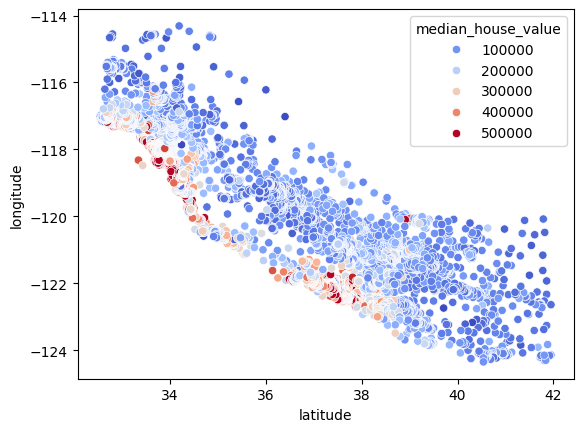

In [27]:
"""
El tema de clusterización puede ser dependiendo de cuales son las características
que queremos nosotros ponerles atención para después caregorizarlos de cierta manera
Por ejemplo, basado en los datos podemos crear clusters o grupos relacionados a la
población o edad de las casas, o tomar la latitud y longitud (coordenadas) para después
hacer una agrupación de sus ingesos medios
"""
import seaborn as sb
sb.scatterplot(x = "latitude", y = "longitude", data = datos, hue = "median_house_value", palette = "coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

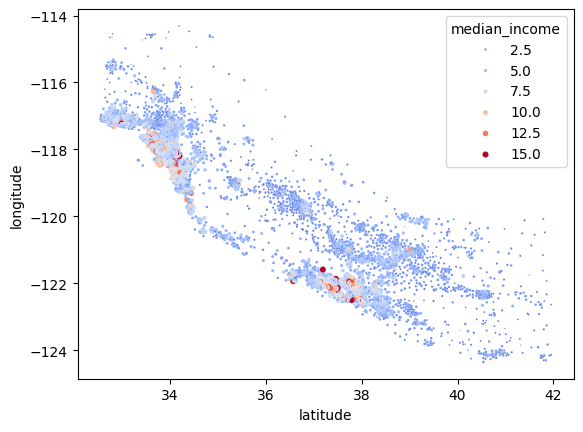

In [28]:
#Pintemos la gráfica basado en los ingresos de las personas
sb.scatterplot(x = "latitude", y = "longitude", data = datos, hue = "median_income",
               palette = "coolwarm", size = datos["median_income"], sizes = (0.001, 20))

In [29]:
"""
Si quisiéramos lanzar una campaña de mercado a distintos lugares de California basados en el
estatus socioeconómico o las ganancias que tienen este mapa no nos serviría, lo ideal
es tener 5 o 6 categorías para aplicar distintas campañas a cada una de esas categorías
"""
#Para esto vamos a usar exclusivamente 3 datos -> latitude, longitude e ingesos medios
datos.loc[:, ["latitude", "longitude", "median_income"]] #El primer parámetro es qué filas queremos, en este caso todas las filas, por eso ponemos dos puntos para considerar desde la primera hasta la última fila y en segundo lugar enviamos una lista de qué columnas queremos

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [30]:
#En este modelo no hay etiquetas, solo vamos a especificar la X
from sklearn.cluster import KMeans

X = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters = 3)
#Podemos modificar varios hiper-parámetros
#n_clusters -> número de grupos
#n_init -> cuántas vueltas va a dar para que inicie el proceso con diferentes puntos aleatorios de inicio
#max_iter -> las iteraciones que va a hacer en cada uno de esos procesos (por defecto 300)
predicciones = modelo.fit_predict(X) #Etas predicciones son los grupos

In [31]:
#Veamos los grupos para después agregarlos a la table original
predicciones. shape #Nos muestra en que nivel socioeconómico está cada casa

(20640,)

In [32]:
#Agreguemos una característica o columna a la X
X["segmento_economico"] = predicciones
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


In [33]:
#Veamos cuántos cayeron en cada segmento
X["segmento_economico"].value_counts()

,count
segmento_economico,
0,9763
1,8439
2,2438


<Axes: xlabel='latitude', ylabel='longitude'>

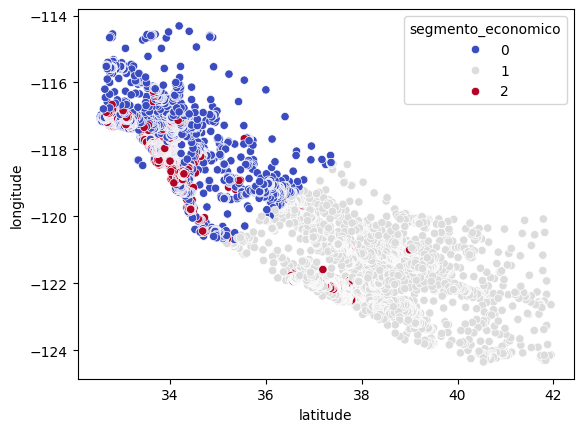

In [34]:
#Hagamos una pequeña gráfica para verlo
sb.scatterplot(x = "latitude", y = "longitude", data = X, hue = "segmento_economico", palette = "coolwarm")

In [37]:
#A veces solo tener tres grupos no sirve de mucho, cambiemos un poco
Y = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters = 6)
predicciones = modelo.fit_predict(Y)
Y["segmento_economico"] = predicciones
Y

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,2
1,37.86,-122.22,8.3014,2
2,37.85,-122.24,7.2574,2
3,37.85,-122.25,5.6431,2
4,37.85,-122.25,3.8462,5
...,...,...,...,...
20635,39.48,-121.09,1.5603,5
20636,39.49,-121.21,2.5568,5
20637,39.43,-121.22,1.7000,5
20638,39.43,-121.32,1.8672,5


In [38]:
Y["segmento_economico"].value_counts()

,count
segmento_economico,
4,7011
5,4861
3,3840
2,2786
0,1683
1,459


<Axes: xlabel='latitude', ylabel='longitude'>

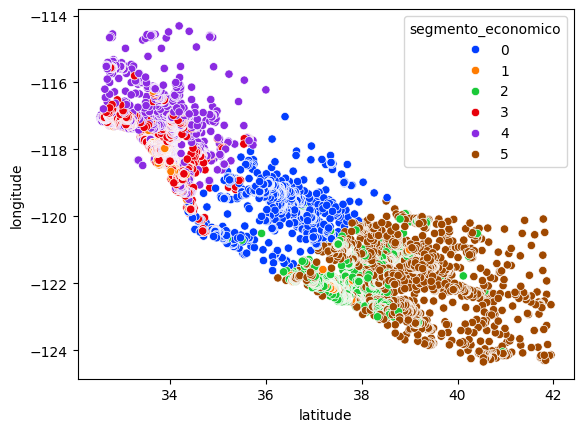

In [40]:
#Hagamos una pequeña gráfica para verlo
sb.scatterplot(x = "latitude", y = "longitude", data = Y, hue = "segmento_economico", palette = "bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

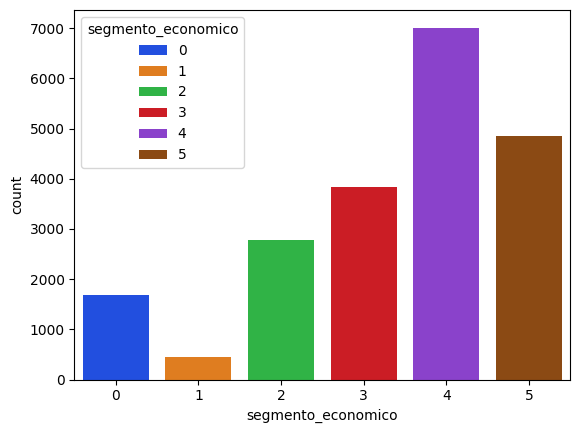

In [43]:
#Creemos otras gráficas para ver quienes son los que más ganan
sb.countplot(x = "segmento_economico", data = Y, hue = "segmento_economico", palette = "bright")

In [46]:
#Queremos confirmar que los que más ganan son los del grupo uno
#Lo que hacemos es una agrupación por segmento económico (SEIS GRUPOS) y por cada grupo, calcule su promedio
Y.groupby(["segmento_economico"])["median_income"].mean()

,median_income
segmento_economico,
0,2.669611
1,10.946702
2,5.509181
3,5.516542
4,2.873155
5,2.817809
